# Import Modules

In [159]:
import librosa
import torch
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import AgglomerativeClustering

from embedder import SpeechEmbedder
from utils.hparams import HParam
from utils.audio import Audio

# Parameters

In [192]:
hp = HParam('config/default.yaml')
display(hp)

{'gpu': 'cuda:1',
 'audio': {'n_fft': 512,
  'num_freq': 257,
  'sample_rate': 16000,
  'hop_length': 160,
  'win_length': 400,
  'min_level_db': -100.0,
  'ref_level_db': 20.0,
  'preemphasis': 0.97,
  'power': 0.3},
 'embedder': {'num_mels': 40,
  'n_fft': 512,
  'emb_dim': 256,
  'lstm_hidden': 768,
  'lstm_layers': 3,
  'window': 10,
  'stride': 20}}

In [ ]:
hp.embedder.window = 10
hp.embedder.stride = 20

# Build & Load

In [160]:

torch.cuda.set_device(hp.gpu)

embedder = SpeechEmbedder(hp).cuda()
chkpt_embed = torch.load('pretrained_d-vector_embedding.pt')
embedder.load_state_dict(chkpt_embed)
embedder.eval()

audio = Audio(hp)

dvec_wav, _ = librosa.load('data/short.wav', sr=16000)
dvec_wav=librosa.util.normalize(dvec_wav)
dvec_mel = audio.get_mel(dvec_wav)
dvec_mel = torch.from_numpy(dvec_mel).float().cuda()
dvec = embedder(dvec_mel)

# Clustering

In [161]:
display(dvec_wav.shape)

(41254,)

In [162]:
mel_length = dvec_mel.shape[1]
mel_size = dvec_mel.shape[0]
display(mel_length)

258

In [163]:
dvec = torch.zeros(256,mel_length-hp.embedder.window).cuda()

In [195]:
for i in range(floor(mel_length-hp.embedder.window)/hp.embedder.stride):
    dvec[:,i] = embedder(dvec_mel[:,hp.embedder.stride*i:window_size+hp.embedder.stride*i])
display(dvec.shape)

TypeError: 'numpy.float64' object cannot be interpreted as an integer

In [165]:
dvec_numpy = dvec.cpu().detach().numpy()

In [191]:
clustering = AgglomerativeClustering(n_clusters=None,distance_threshold=0.5,linkage='average').fit(dvec_numpy.transpose())
clustering.labels_

array([21, 16,  5,  5,  5,  5,  5, 23, 23,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  7, 20, 19, 19, 19, 14, 14, 14, 14, 14, 14, 29, 29, 13, 13, 13,
       12, 12, 12, 12, 22, 22, 22, 30, 22, 30, 30, 30, 30, 30, 30, 18, 18,
       18, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 27,
       27, 17, 10, 10, 25, 25,  2,  2, 28, 28,  9,  9,  9,  9,  9,  9,  9,
        9,  9,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2, 15, 15, 15,  4,  4,  4,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  8,  8,  8,  8,
        8, 11, 11,  0,  6,  6, 24,  1, 31,  1,  1, 32,  0,  0,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  6,  6,  3,  3,  4,  2,  2,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  0,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2, 26

# Plotting

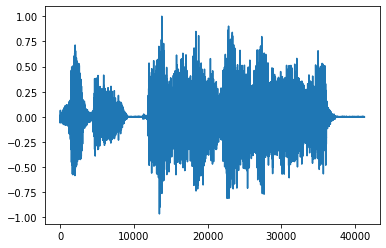

In [182]:
plt.figure();
plt.plot(dvec_wav)

plt.show()